In [1]:
import pip
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
restaurant_review=pd.read_csv('C:/datasets/European Restaurant Reviews.csv')

In [5]:
restaurant_review.head(10)

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review
0,France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the c...
1,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium,..."
2,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023 •,"This is an attractive venue with welcoming, al..."
3,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,Mar 2023 •,Sadly I used the high TripAdvisor rating too ...
4,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,Nov 2022 •,From the start this meal was bad- especially g...
5,France,The Frog at Bercy Village,Negative,"Shocking management, TERRIBLE service by mum a...",Jul 2021 •,We visited this restaurant on Saturday night a...
6,France,The Frog at Bercy Village,Negative,We tired the tasting menu - avoid,Jan 2020 •,We tired the tasting menu with wine pairing. T...
7,France,The Frog at Bercy Village,Negative,Huge Disappointment,Oct 2019 •,This restaurant’s high rating is wholly unwarr...
8,France,The Frog at Bercy Village,Negative,Expensive mediocre food and service,Jun 2019 •,We got the Tasting Menu and wine pairing. Fran...
9,France,The Frog at Bercy Village,Negative,all around awful,May 2019 •,My wife and I booked well in advance based on ...


In [11]:
#Numbers of + and - reviews
restaurant_review.value_counts(['Sentiment'])

Sentiment
Positive     1237
Negative      265
Name: count, dtype: int64

In [143]:
#Dataframe of numbers of + and - reviews for each country
temp_data=pd.DataFrame(restaurant_review.groupby('Country').value_counts(['Sentiment']))
temp_data

count
Country Sentiment       
Cuba    Positive     109
        Negative      37
France  Positive     360
        Negative     152
India   Positive      81
Italy   Positive     270
        Negative      48
Morroco Positive     207
        Negative       3
Poland  Positive     120
        Negative      15
Russia  Positive      90
        Negative      10

In [7]:
#How many reviews were given by each country?
restaurant_review.value_counts(["Country"])

Country
France     512
Italy      318
Morroco    210
Cuba       146
Poland     135
Russia     100
India       81
Name: count, dtype: int64

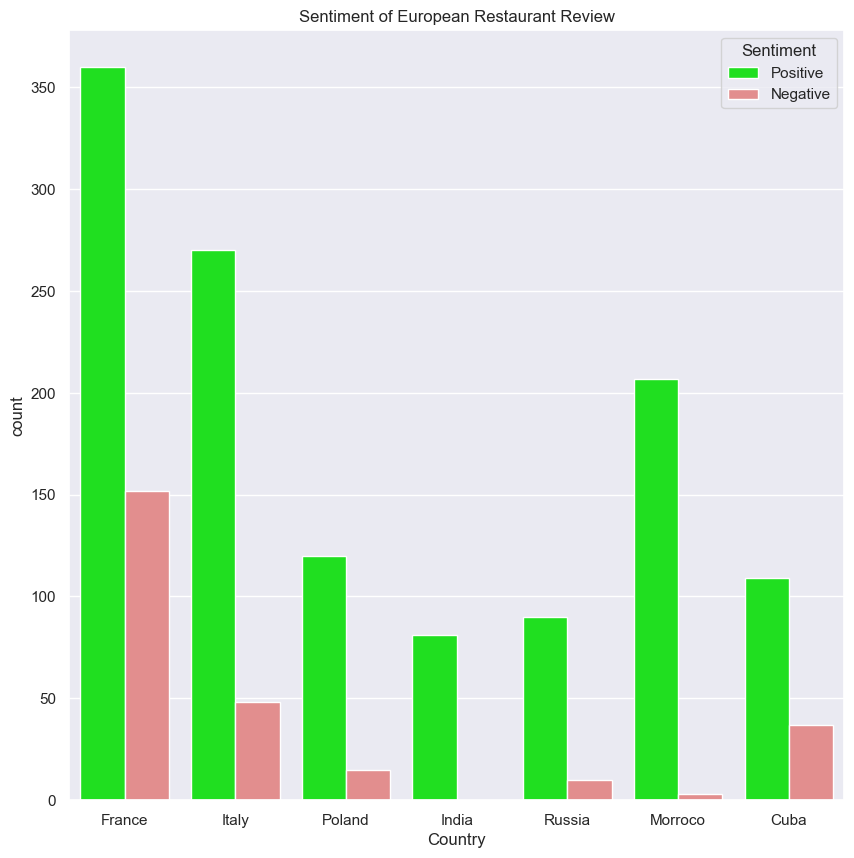

In [119]:
#Sentiment of European restaurant review
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 10))
bar1=sns.countplot(x='Country',hue='Sentiment',data=restaurant_review,stat='count',hue_order=['Positive','Negative'],palette=['lime','lightcoral']).set_title('Sentiment of European Restaurant Review')

In [197]:
#How many positive and negative reviews are there for each country?
temp_data['Total']=restaurant_review.value_counts(["Country"])
temp_data

count  Total
Country Sentiment              
Cuba    Positive     109    146
        Negative      37    146
France  Positive     360    512
        Negative     152    512
India   Positive      81     81
Italy   Positive     270    318
        Negative      48    318
Morroco Positive     207    210
        Negative       3    210
Poland  Positive     120    135
        Negative      15    135
Russia  Positive      90    100
        Negative      10    100

In [217]:
#table showing ratios of positive and negative reviews for each country
temp_data['ratio']=round((temp_data['count']*100/temp_data['Total']),3)
temp_data

count  Total    ratio
Country Sentiment                       
Cuba    Positive     109    146   74.658
        Negative      37    146   25.342
France  Positive     360    512   70.312
        Negative     152    512   29.688
India   Positive      81     81  100.000
Italy   Positive     270    318   84.906
        Negative      48    318   15.094
Morroco Positive     207    210   98.571
        Negative       3    210    1.429
Poland  Positive     120    135   88.889
        Negative      15    135   11.111
Russia  Positive      90    100   90.000
        Negative      10    100   10.000

Text(0.5, 1.0, 'Positive Sentiment Ratio')

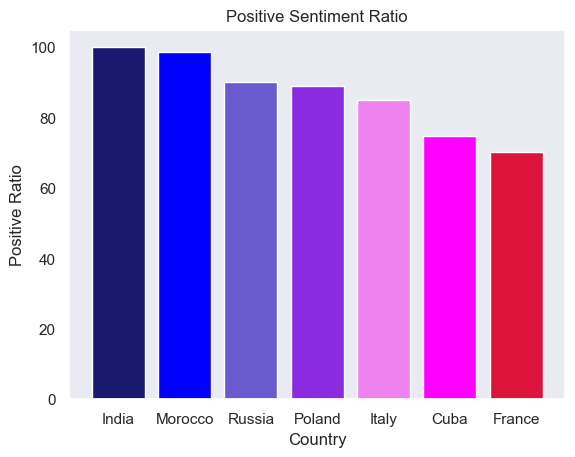

In [227]:
#Positive review ratio for each country
postive_ratio=np.array([100,98.571,90,88.889,84.906,74.658,70.312])
country_temp=np.array(['India','Morocco','Russia','Poland','Italy','Cuba','France'])
plt.bar(country_temp,postive_ratio,color=['midnightblue','blue','slateblue','blueviolet','violet','magenta','crimson'])
plt.grid()
plt.xlabel('Country')
plt.ylabel('Positive Ratio')
plt.title('Positive Sentiment Ratio')

In [376]:
trend=pd.DataFrame(restaurant_review.value_counts('Review Date'))
trend.head(6)

,count
Review Date,
May 2014 •,108
Jun 2024 •,70
Feb 2022 •,59
May 2019 •,48
Mar 2019 •,37
Oct 2019 •,35


Text(0.5, 1.0, 'Number of restaurant reviews each year')

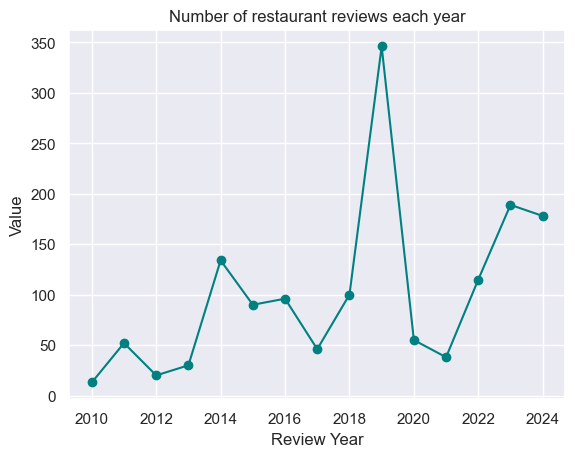

In [454]:
#Change of number of restaurant reviews from 2010 to 2024
yr_order=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','2024']
drop_points=restaurant_review['Review Date'].str.replace('•','')
ax=drop_points.str.strip().str[-4:].value_counts().loc[yr_order].plot(kind='line',color='teal',marker='o')
ax.set_ylabel('Value')
ax.set_xlabel('Review Year')
ax.set_title('Number of restaurant reviews each year')

<Axes: title={'center': 'Ratio of reviews for each restaurant'}, ylabel='count'>

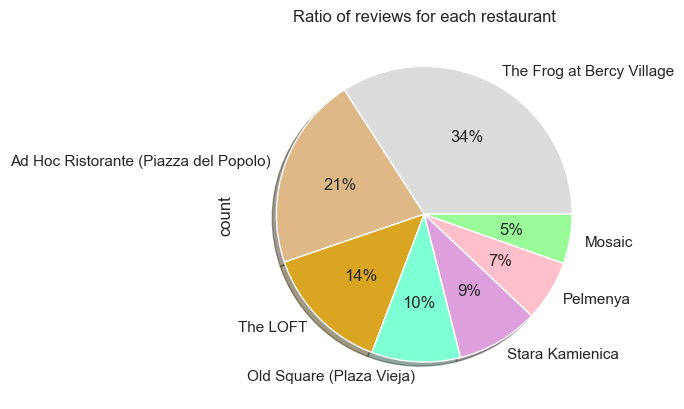

In [462]:
#Ratio of reviews for restaurants
colorsforpie=['gainsboro','burlywood','goldenrod','aquamarine','plum','pink','palegreen']
restaurant_review.value_counts('Restaurant Name').plot(kind='pie',autopct='%1.0f%%',colors=colorsforpie,shadow=True,title='Ratio of reviews for each restaurant')

In [521]:
#Average length of reviews for each country
restaurant_review.groupby('Country')['Review'].apply(lambda x:np.mean(x.str.len()))

Country
Cuba       257.753425
France     440.136719
India      172.098765
Italy      466.685535
Morroco    276.685714
Poland     230.074074
Russia     358.980000
Name: Review, dtype: float64

In [527]:
#Average length of + and - reviews for each country
restaurant_review.groupby(['Country','Sentiment'])['Review'].apply(lambda x:np.mean(x.str.len()))

Country  Sentiment
Cuba     Negative     259.756757
         Positive     257.073394
France   Negative     930.440789
         Positive     233.119444
India    Positive     172.098765
Italy    Negative     785.708333
         Positive     409.970370
Morroco  Negative     285.333333
         Positive     276.560386
Poland   Negative     379.800000
         Positive     211.358333
Russia   Negative     636.200000
         Positive     328.177778
Name: Review, dtype: float64

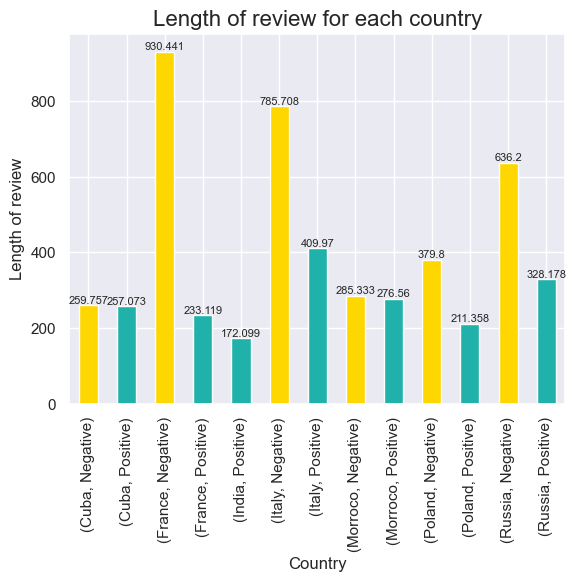

In [619]:
#length of review for each country
ax=restaurant_review.groupby(['Country','Sentiment'])['Review'].apply(lambda x:np.mean(x.str.len())).plot(kind='bar',
                                                                                                          color=['gold','lightseagreen','gold','lightseagreen','lightseagreen','gold','lightseagreen','gold','lightseagreen','gold','lightseagreen'])
ax.set_ylabel('Length of review')
ax.set_xlabel('Country')
ax.set_title('Length of review for each country',fontsize=16)
for bars in ax.containers:
    ax.bar_label(bars,fontsize=8)